# U.S. Medical Insurance Costs

## Goals for this project

Understand the effects of smoking, age, and children on health insurance costs. Provide the descriptive statistics of each and see if we can come up with a predictive / regression model for the cost of insurance. 

In [1]:
# importing libraries
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
sns.set_theme()
sns.set_palette("pastel")
#reading insurance.csv as a dictionary

with open("insurance.csv") as insurance_csv:
    data = pd.read_csv(insurance_csv, header=0)
    
    

In [2]:
print (data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [5]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [6]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
data["age"].tolist()
data["bmi"].tolist()
data["sex"].tolist()
data["children"].tolist()
data["smoker"].tolist()
data["region"].tolist()
data["charges"].tolist()

[16884.924,
 1725.5523,
 4449.462,
 21984.47061,
 3866.8552,
 3756.6216,
 8240.5896,
 7281.5056,
 6406.4107,
 28923.13692,
 2721.3208,
 27808.7251,
 1826.843,
 11090.7178,
 39611.7577,
 1837.237,
 10797.3362,
 2395.17155,
 10602.385,
 36837.467,
 13228.84695,
 4149.736,
 1137.011,
 37701.8768,
 6203.90175,
 14001.1338,
 14451.83515,
 12268.63225,
 2775.19215,
 38711.0,
 35585.576,
 2198.18985,
 4687.797,
 13770.0979,
 51194.55914,
 1625.43375,
 15612.19335,
 2302.3,
 39774.2763,
 48173.361,
 3046.062,
 4949.7587,
 6272.4772,
 6313.759,
 6079.6715,
 20630.28351,
 3393.35635,
 3556.9223,
 12629.8967,
 38709.176,
 2211.13075,
 3579.8287,
 23568.272,
 37742.5757,
 8059.6791,
 47496.49445,
 13607.36875,
 34303.1672,
 23244.7902,
 5989.52365,
 8606.2174,
 4504.6624,
 30166.61817,
 4133.64165,
 14711.7438,
 1743.214,
 14235.072,
 6389.37785,
 5920.1041,
 17663.1442,
 16577.7795,
 6799.458,
 11741.726,
 11946.6259,
 7726.854,
 11356.6609,
 3947.4131,
 1532.4697,
 2755.02095,
 6571.02435,
 4441

In [8]:
df = pd.get_dummies(data, columns = ['sex', 'smoker', 'region'])
print(df)

      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

In [9]:
# creating x and y variables for linear regression models
y = df["charges"]
x = df[["age", "bmi", "children", "sex_female", "sex_male", "smoker_no", "smoker_yes", \
          "region_northeast", "region_northwest", "region_southeast", "region_southwest"]]

In [10]:
#sklearn linear regression model

linreg = linear_model.LinearRegression()
linreg.fit(x, y)
linreg.coef_
linreg.intercept_

-666.9377199366245

In [11]:
#sklearn r squared

linreg.score(x, y)

0.7509130345985207

In [12]:
import statsmodels.api as sm

In [13]:
# using statsmodels to run a regression
# adding constant to the model, running statsmodels OLS, fitting the model, then printing the summary

x = sm.add_constant(x)
mod = sm.OLS(y, x)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        04:07:08   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -296.4168    430.507  

<AxesSubplot:xlabel='age', ylabel='charges'>

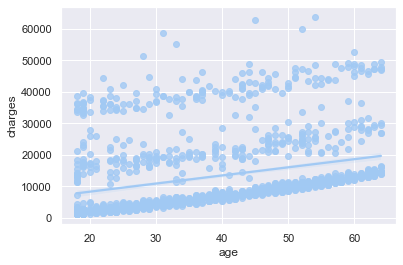

In [14]:
#Seaborn visualizations
sns.regplot(x="age", y="charges", data=data)

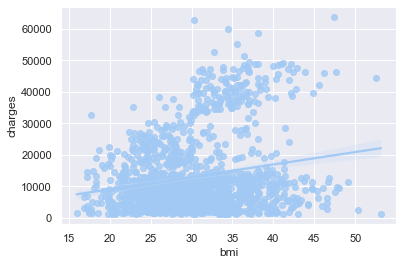

In [15]:
bmiplot = sns.regplot(x="bmi", y="charges", data=data)

<AxesSubplot:xlabel='children', ylabel='charges'>

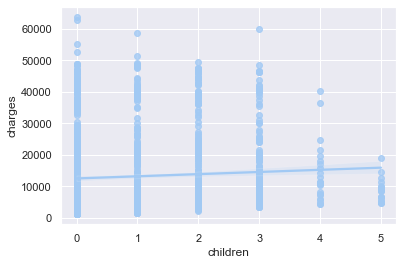

In [16]:
sns.regplot(x="children", y="charges", data=data)

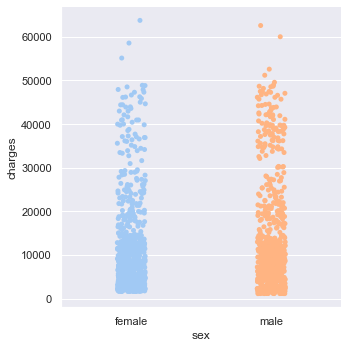

In [17]:
sns.catplot(x="sex", y="charges", data=data)

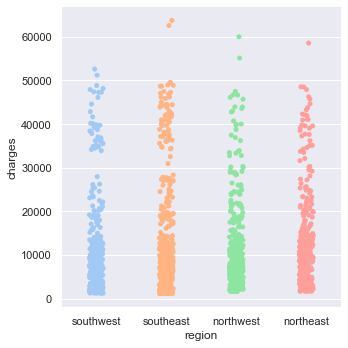

In [18]:
sns.catplot(x="region", y="charges", data=data)